In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

#data cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
import seaborn as sns

In [3]:
#filter for data analyst jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

#drop nan values 
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

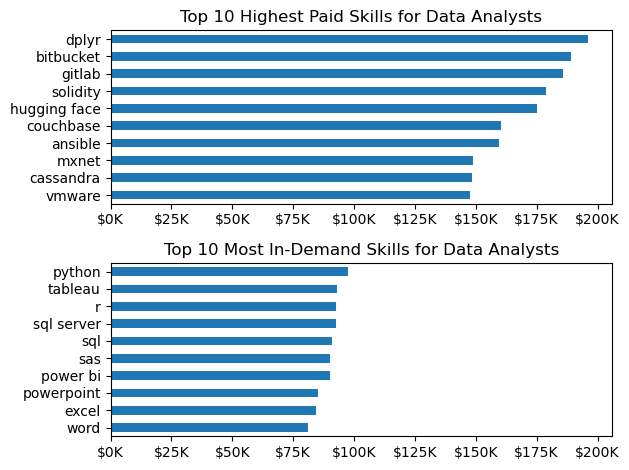

In [5]:
df_DA_US = df_DA_US.explode("job_skills")
df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])
df_DA_top_pay = df_DA_US_group.sort_values(by="median", ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by="count", ascending=False).head(10).sort_values(by="median", ascending=False)

fig, ax = plt.subplots(2, 1)

#top 10 highest paid skills 
df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

#top 10 most in demand skills
df_DA_skills[::-1].plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()

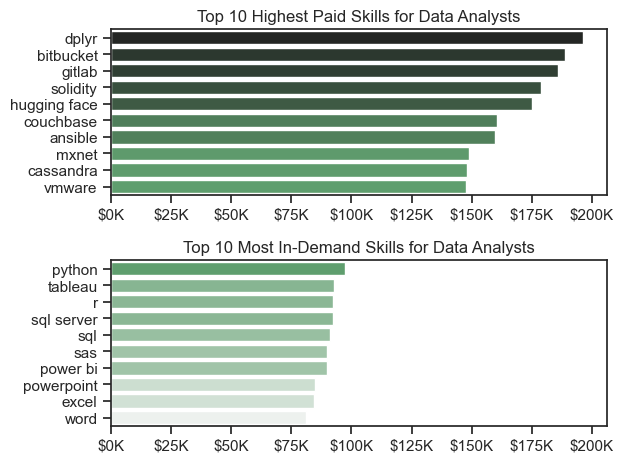

In [ ]:
#Plotting in seaborn

fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

#top 10 highest paid skills 

sns.barplot(data=df_DA_top_pay, x="median", y=df_DA_top_pay.index, ax=ax[0], hue="median", palette="dark:g_r")
ax[0].legend().remove()
#df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

#top 10 most in demand skills

sns.barplot(data=df_DA_skills, x="median", y=df_DA_skills.index, ax=ax[1], hue="median", palette="light:g")
ax[1].legend().remove()
#df_DA_skills[::-1].plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()

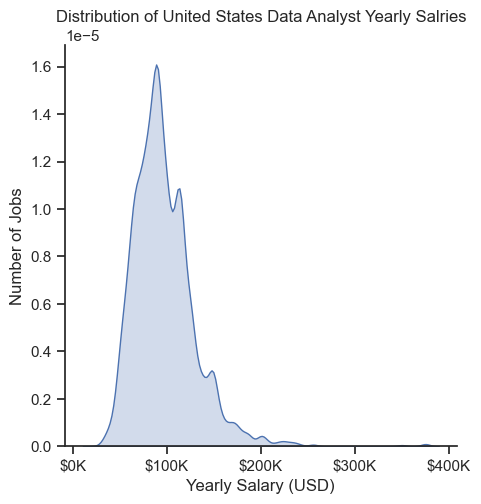

In [18]:
sns.displot(df_DA_US["salary_year_avg"], kind="kde", fill=True)
plt.title("Distribution of United States Data Analyst Yearly Salries")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("Number of Jobs")

# Format y-axis to show in $K
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))


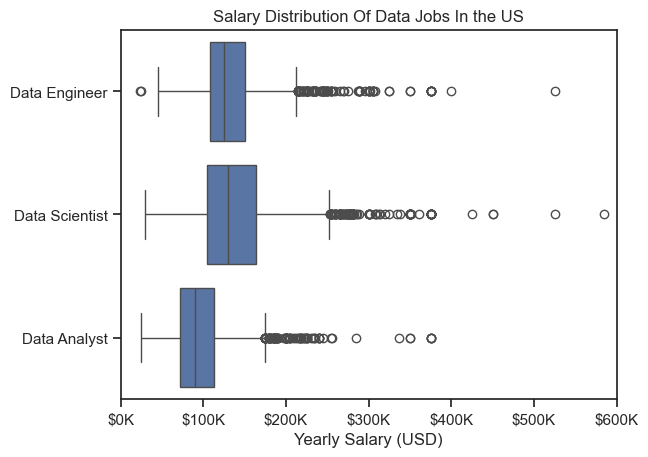

In [20]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

#filter for data analyst jobs in the US
df_US = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()
df_US = df_US.dropna(subset=["salary_year_avg"])

job_list = [df_US[df_US["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]

sns.boxplot(data=df_US, x="salary_year_avg", y="job_title_short")

plt.title("Salary Distribution Of Data Jobs In the US")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0, 600000)
plt.show()